In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [60]:
train = pd.read_csv('train.csv')
train = train.rename(index=str, columns={'i':'cust', 'j': 'cat', 't':'week'})

In [61]:
train.shape

(76502, 5)

In [62]:
train = train.sort_values(by=['week', 'cust'], ascending=[True, True])
train.head(5)

,cust,cat,week,price,advertised
0,4,7,0,2.137451,0
1,6,1,0,0.863341,0
2,8,6,0,0.799155,0
3,8,25,0,3.023893,0
4,9,6,0,0.799155,0


#### Plot price of some products over weeks to detect possible discounts

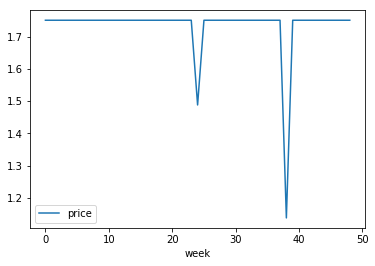

In [63]:
train[train['cat']==5].plot('week', 'price')

#### Create a flag to mark discount

In [64]:
median = train[['cat', 'price']].groupby('cat').median()
train['price_median'] = train['cat'].map(median['price'])
train['discount'] = (train['price'] < train['price_median']).astype(int)
train.drop(['price_median'], axis=1, inplace=True)
train.head(5)

,cust,cat,week,price,advertised,discount
0,4,7,0,2.137451,0,0
1,6,1,0,0.863341,0,0
2,8,6,0,0.799155,0,0
3,8,25,0,3.023893,0,0
4,9,6,0,0.799155,0,0


#### Add overall popularity column as a number of time an item has been bought

In [65]:
pop_all = train[['cat', 'price']].groupby('cat').size()
train['pop_all'] = train['cat'].map(pop_all)
train.head(5)

,cust,cat,week,price,advertised,discount,pop_all
0,4,7,0,2.137451,0,0,2996
1,6,1,0,0.863341,0,0,5188
2,8,6,0,0.799155,0,0,16190
3,8,25,0,3.023893,0,0,331
4,9,6,0,0.799155,0,0,16190


#### Add popularity per customer column as a number of time an item has been bought by a customer

In [66]:
pop_cust = train[['cat', 'cust', 'price']].groupby(['cust', 'cat']).size().reset_index(name='pop_cust')
pop_cust.head(20)
train = train.merge(pop_cust, how='left', on=('cust', 'cat'))
train.head(5)

,cust,cat,week,price,advertised,discount,pop_all,pop_cust
0,4,7,0,2.137451,0,0,2996,3
1,6,1,0,0.863341,0,0,5188,6
2,8,6,0,0.799155,0,0,16190,10
3,8,25,0,3.023893,0,0,331,1
4,9,6,0,0.799155,0,0,16190,9


#### Check correlation between popularity and price

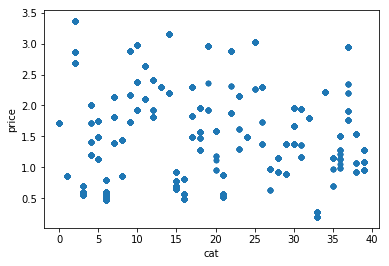

In [67]:
train[['cat', 'price']].plot(x='cat', y='price', kind='scatter')

#### Plot category distibution given a customer

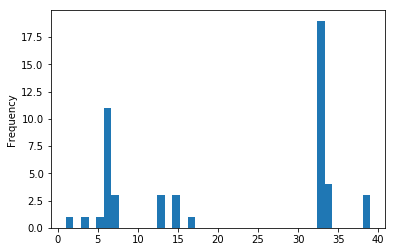

In [68]:
i = 4
train.loc[train['cust']==i, 'cat'].plot('hist', bins=40)

#### Plot overall category distribution

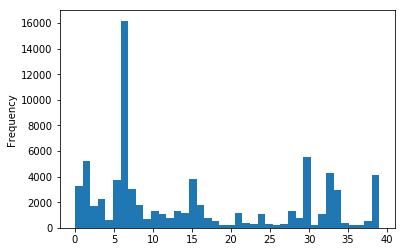

In [69]:
train['cat'].plot('hist', bins=40)

In [70]:
custs = np.sort(train['cust'].unique())
custs.shape
cats = np.sort(train['cat'].unique())
cats.shape
weeks = np.sort(train['week'].unique())
weeks.shape

(49,)

In [71]:
from itertools import product
train_full = pd.DataFrame(data=list(product(custs, cats, weeks)), columns=['cust', 'cat', 'week'])
train_full = train_full.sort_values(by=['week', 'cust', 'cat'])

In [72]:
train_full['cat'] = train_full['cat'].astype('uint8')
train_full['week'] = train_full['week'].astype('uint8')
train_full['cust'] = train_full['cust'].astype('uint16')

In [73]:
categories = train.drop_duplicates(subset='cat').drop(['cust', 'week'], axis=1)

In [74]:
train_full = train_full.merge(categories , how='left', on='cat', copy=False)
train_full.head()

,cust,cat,week,price,advertised,discount,pop_all,pop_cust
0,0,0,0,1.717944,0,0,3251,1
1,0,1,0,0.863341,0,0,5188,6
2,0,2,0,3.366060,0,0,1714,1
3,0,3,0,0.699985,0,0,2214,2
4,0,4,0,2.012190,0,0,595,1


In [75]:
train['purch'] = 1
train.head()

,cust,cat,week,price,advertised,discount,pop_all,pop_cust,purch
0,4,7,0,2.137451,0,0,2996,3,1
1,6,1,0,0.863341,0,0,5188,6,1
2,8,6,0,0.799155,0,0,16190,10,1
3,8,25,0,3.023893,0,0,331,1,1
4,9,6,0,0.799155,0,0,16190,9,1


In [76]:
train_full = train_full.merge(train[['cust', 'cat', 'week', 'purch']], how='left', on=('cust', 'cat', 'week'))

In [79]:
train_full.fillna(0, inplace=True)

In [83]:
train_full.shape

(3920000, 9)

In [89]:
train_full['purch'] = train_full['purch'].astype('uint')

In [90]:
train_full.head()

,cust,cat,week,price,advertised,discount,pop_all,pop_cust,purch
0,0,0,0,1.717944,0,0,3251,1,0
1,0,1,0,0.863341,0,0,5188,6,0
2,0,2,0,3.366060,0,0,1714,1,0
3,0,3,0,0.699985,0,0,2214,2,0
4,0,4,0,2.012190,0,0,595,1,0


In [18]:
train.describe()

,cust,cat,week,price,advertised,discount,pop_all,pop_cust,purch
count,76502.000000,76502.000000,76502.000000,76502.000000,76502.000000,76502.000000,76502.000000,76502.000000,76502.0
mean,1002.827155,15.191015,23.990419,1.409388,0.068652,0.068652,5759.828920,4.919898,1.0
std,577.766624,12.628597,14.153333,0.758152,0.252863,0.252863,5599.365383,3.988620,0.0
min,0.000000,0.000000,0.000000,0.194431,0.000000,0.000000,194.000000,1.000000,1.0
25%,505.000000,6.000000,12.000000,0.799155,0.000000,0.000000,1744.000000,2.000000,1.0
50%,1006.000000,9.000000,24.000000,1.281862,0.000000,0.000000,3778.000000,4.000000,1.0
75%,1506.000000,30.000000,36.000000,1.961365,0.000000,0.000000,5520.000000,7.000000,1.0
max,1999.000000,39.000000,48.000000,3.366060,1.000000,1.000000,16190.000000,22.000000,1.0


In [19]:
test = pd.read_csv('promotion_schedule.csv')

In [20]:
test.shape

(39, 3)

In [21]:
test.head()

,j,discount,advertised
0,0,0.0,0
1,1,0.0,0
2,2,0.0,0
3,3,0.0,0
4,4,0.0,0


In [22]:
test.describe()

,j,discount,advertised
count,39.000000,39.000000,39.000000
mean,19.487179,0.005128,0.025641
std,11.842990,0.032026,0.160128
min,0.000000,0.000000,0.000000
25%,9.500000,0.000000,0.000000
50%,19.000000,0.000000,0.000000
75%,29.500000,0.000000,0.000000
max,39.000000,0.200000,1.000000


In [23]:
pred = pd.read_csv('prediction_example.csv')
pred.head()

,i,j,prediction
0,0,0,0.689943
1,0,1,0.570146
2,0,2,0.802253
3,0,3,0.214296
4,0,4,0.885676


In [24]:
pred.shape

(120, 3)